# Task No.04    Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.



Dataset :-  https://www.kaggle.com/gti-upm/leapgestrecog

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tkinter import filedialog
import tkinter as tk

In [10]:
data_path = "leapGestRecog/00/"
categories = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [22]:
image_data = []
for category in categories:
    class_index = categories.index(category)
    path = os.path.join(data_path, category)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            image_data.append([resized_img, class_index])
        except Exception as e:
            pass
np.random.shuffle(image_data)
input_data = np.array([x[0] for x in image_data])
labels = to_categorical(np.array([x[1] for x in image_data]), num_classes=len(categories))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=0.2, random_state=42)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(categories), activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
IMG_SIZE = 50
EPOCHS = 10

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
50/50 [==============================] - 6s 103ms/step - loss: 6.9585 - accuracy: 0.8512 - val_loss: 0.0157 - val_accuracy: 0.9925
Epoch 2/10
50/50 [==============================] - 5s 107ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0065 - val_accuracy: 0.9975
Epoch 3/10
50/50 [==============================] - 5s 102ms/step - loss: 0.0380 - accuracy: 0.9937 - val_loss: 2.7480e-04 - val_accuracy: 1.0000
Epoch 4/10
50/50 [==============================] - 5s 99ms/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.0021 - val_accuracy: 0.9975
Epoch 5/10
50/50 [==============================] - 5s 94ms/step - loss: 0.0584 - accuracy: 0.9894 - val_loss: 0.0041 - val_accuracy: 0.9975
Epoch 6/10
50/50 [==============================] - 5s 98ms/step - loss: 0.0330 - accuracy: 0.9950 - val_loss: 2.1354e-06 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 4s 88ms/step - loss: 0.0164 - accuracy: 0.9969 - val_loss: 0.0037 - val_accuracy: 0.9975
Ep

In [27]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
    
label[:5]

[1, 4, 4, 3, 6]

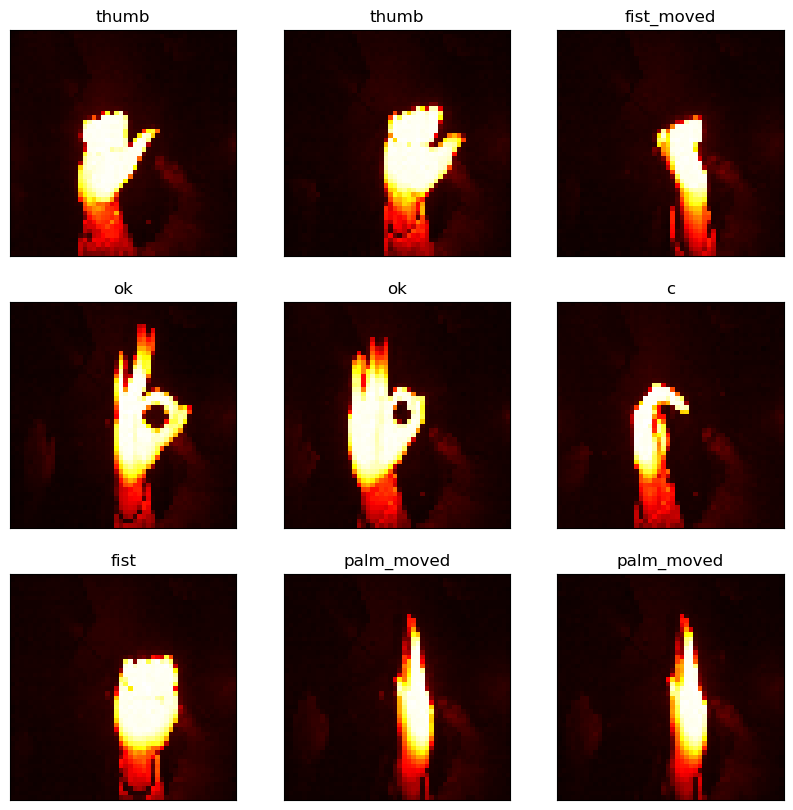

In [28]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]][3:])
plt.show()

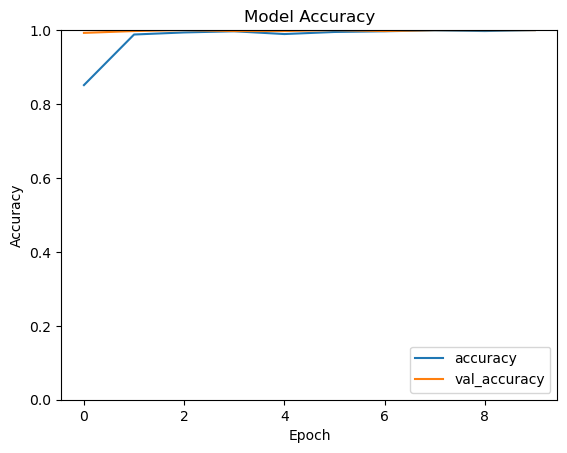

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.show()

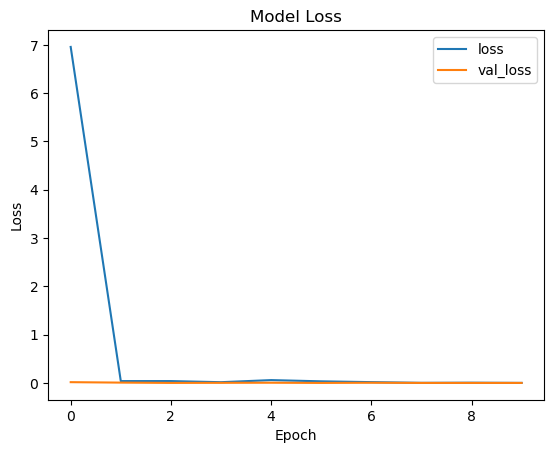

In [30]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.show()

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f}%'.format(test_accuracy * 100))

13/13 [==============================] - 0s 16ms/step - loss: 5.2120e-07 - accuracy: 1.0000
Test accuracy: 100.00%


13/13 [==============================] - 0s 16ms/step


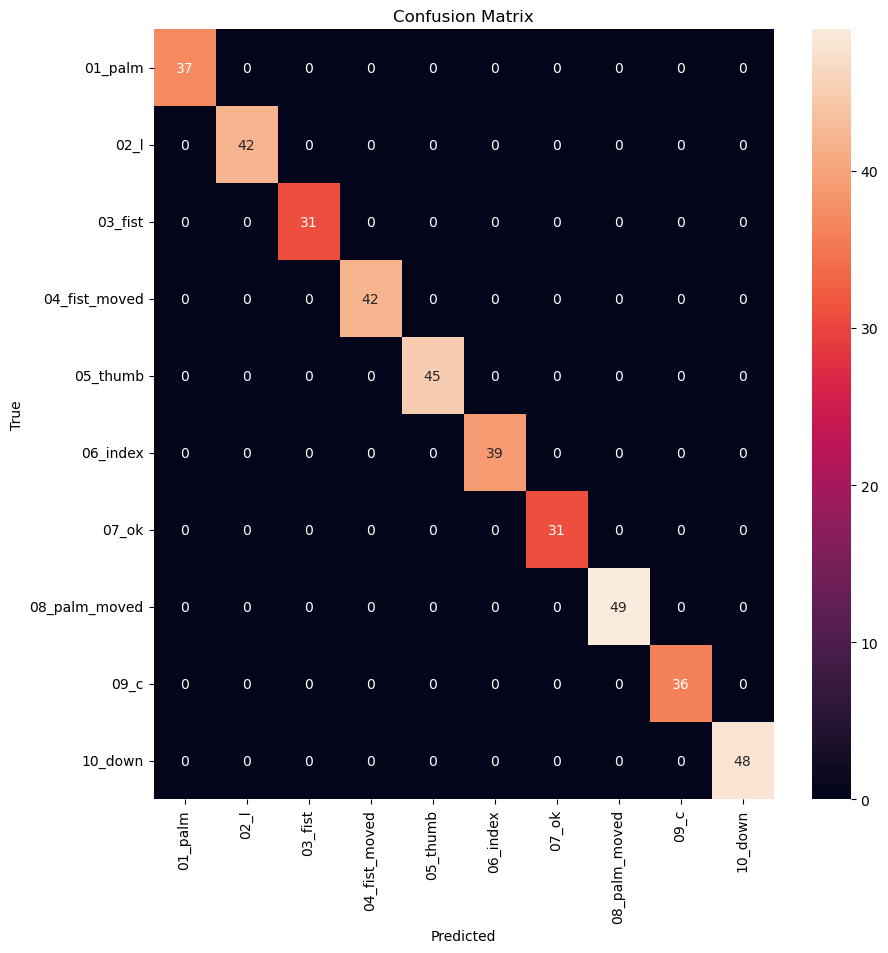

In [34]:
y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()